In [3]:
# -*- coding:UTF-8 -*-


from corpus import *
from vsm import *
from vsm.spatial import KL_div
import numpy as np


k = topic_range[0]
v = lda_v[k]
c.words

# train the model and create a TfViewer object
tf = TF(c, context_type)
tf.train()
tf_v = TfViewer(c, tf)

# print the most frequent terms in the document
# remember that IPython automatically prints the last cell of a document
tf_v.coll_freqs()




#v.topics()

#v.doc_topics(v.labels[:3])


#v.dist(v.labels[0], v.labels[1])
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='/home/hongliang/Downloads/msyh.ttf/msyh.ttf')
import sys
reload(sys)
kongzi = []
mengzi = []
xunzi =[]

count = 0
for label in v.labels[:]:
    if '孟子'.decode('utf-8') in label:
        mengzi.append(count)
    elif '论语'.decode('utf-8') in label:
        kongzi.append(count)
    elif '荀子'.decode('utf-8') in label:
        xunzi.append(count)
    count += 1



In [4]:
def similarity(c1,c2):
    A = np.zeros((len(c1),len(c2)))
    for m in range(len(c1)):
        for n in range(len(c2)):
            A[m][n]= v.dist(v.labels[c1[m]],v.labels[c2[n]]) 
    print "while k quals",k,',','JSD goes',np.mean(A)
    return np.mean(A)

def kl_similarity(c1,c2):
    A = np.zeros((len(c1),len(c2)))
    for m in range(len(c1)):
        for n in range(len(c2)):
            A[m][n]= v.dist(v.labels[c1[m]],v.labels[c2[n]], dist_fn=KL_div) 
    print "while k quals",k,',','first to second KLD goes',np.mean(A)
    
    B = np.zeros((len(c1),len(c2)))
    for m in range(len(c1)):
        for n in range(len(c2)):
            B[m][n]= v.dist(v.labels[c2[n]],v.labels[c1[m]], dist_fn=KL_div) 
    print "while k quals",k,',','second to first KLD goes',np.mean(B)    
    return np.mean(A),np.mean(B)

def perplexity(theta, corpus, v):
    a = (v.phi[corpus] * theta).sum(axis=1)
    a = np.log2(a).sum()
    return a / len(corpus)

In [5]:
# from vsm import viewer
# corpus = v.corpus.corpus
# model = v.model.model
# viewer.ldacgsviewer.LdaCgsViewer(corps,model)

In [6]:
corpus = v.corpus.corpus
d_value = dict([])
for i in range(4):
    k = topic_range[i]
    v = lda_v[k]
    theta = v.aggregate_doc_topics(all_ids)
    theta = theta[np.argsort(theta['i'])]
    theta = np.array(theta['value'])
    P = perplexity(theta, corpus, v)
    d_value[str(k)] = []
    print 'kongzi mengzi JSD'
    d_value[str(k)].append(similarity(kongzi,mengzi))
    print 'kongzi xunzi JSD'
    d_value[str(k)].append(similarity(kongzi,xunzi))
    print 'xunzi mengzi JSD'
    d_value[str(k)].append(similarity(xunzi,mengzi))
    print 'kongzi mengzi KLD'
    d_value[str(k)].append(kl_similarity(kongzi,mengzi)[0])
    d_value[str(k)].append(kl_similarity(kongzi,mengzi)[1])
    print 'kongzi xunzi KLD'
    d_value[str(k)].append(kl_similarity(kongzi,xunzi)[0])
    d_value[str(k)].append(kl_similarity(kongzi,xunzi)[1])
    print 'xunzi mengzi KLD'
    d_value[str(k)].append(kl_similarity(xunzi,mengzi)[0])
    d_value[str(k)].append(kl_similarity(xunzi,mengzi)[1])
    d_value[str(k)].append(P)
    


In [7]:
print d_value

In [8]:
topicname = []
topicname.append('kongzi mengzi JSD')
topicname.append('kongzi xunzi JSD')
topicname.append ('xunzi mengzi JSD')
topicname.append('kongzi mengzi KLD')
topicname.append('mengzi kongzi KLD')
topicname.append('kongzi xunzi KLD')
topicname.append('xunzi kongzi KLD')
topicname.append('xunzi mengzi KLD')
topicname.append('mengzi xunzi KLD')
topicname.append('perplexity')

In [9]:
from pandas import Series,DataFrame
import pandas as pd
#data = {"Topics":top10topics[:10], "Corpus Weight":top10topicsweight[:10], "Topic Name":[,,,,,,,,,],"Topic Keywords in Descending Order of Weight":chunks(word,10)} 

#data3 = {"name":topicname,"20":d_value['20'],"40":d_value['40'],"60":d_value['60'],"80":d_value['80'],"100":d_value['100'],}
#f3 = DataFrame(data3,columns=['name','20','40','60','80','100'])
data3 = {"name":topicname,"20":d_value['20'],"40":d_value['40'],"60":d_value['60'],"80":d_value['80']}
f3 = DataFrame(data3,columns=['name','20','40','60','80'])
f3

,name,20,40,60,80
0,kongzi mengzi JSD,0.531647,0.646536,0.749249,0.798417
1,kongzi xunzi JSD,0.638123,0.773123,0.778506,0.821801
2,xunzi mengzi JSD,0.590297,0.738896,0.783387,0.823514
3,kongzi mengzi KLD,1.898378,3.747505,5.750826,7.590320
4,mengzi kongzi KLD,4.346204,5.882206,7.213173,7.609258
5,kongzi xunzi KLD,3.754624,6.622456,8.445679,8.898572
6,xunzi kongzi KLD,5.363070,7.998917,6.991168,8.471340
7,xunzi mengzi KLD,2.957886,7.193496,8.448962,8.711570
8,mengzi xunzi KLD,4.527284,6.728929,7.830868,9.091030
9,perplexity,-10.309543,-10.309554,-10.309572,-10.309586


## my method

In [10]:
# from corpus import *
# import numpy as np

# def perplexity(theta, corpus, v):
#    a = (v.phi[corpus] * theta).sum(axis=1)
#    a = np.log2(a).sum()
#    return a / len(corpus)

# v = lda_v[80]
# theta = v.aggregate_doc_topics(all_ids)
# TMP = []
# for a in theta:
#    TMP.append(a[1]) 
# theta = np.array(TMP)
# print theta
# corpus = v.corpus.corpus
# P = perplexity(theta, corpus, v)
# print P

## each to whole

In [11]:
# def perplexity(theta, corpus, v):
#     a = (v.phi[corpus] * theta).sum(axis=1)
#     a = np.log2(a).sum()
#     return a / len(corpus)

# v = lda_v[80]    
# perplexity_num = []
# theta_all = []
# documents = v.corpus.view_contexts('document')
# for doc_id,corpus in zip(all_ids,documents):
#     theta = v.doc_topic_matrix(doc_id)
#     print theta
#     theta_all.append(theta)
#     perplexity_num.append(perplexity(theta,corpus,v))
# perplexity_num = np.array(perplexity_num)
# theta_all = np.array(theta_all)
# print 'each document way',np.mean(perplexity_num)


### Jaimie's Final method

In [12]:
# from corpus import *
# import numpy as np

# def perplexity(theta, corpus, v):
#     a = (v.phi[corpus] * theta).sum(axis=1)
#     a = np.log2(a).sum()
#     return a / len(corpus)

# v = lda_v[80]
# corpus = v.corpus.corpus

# # v.aggregate_doc_topics returns an ndarray instead of just values.
# theta = v.aggregate_doc_topics(all_ids)
# print 'theta 1 step',theta
# theta = theta[np.argsort(theta['i'])]
# print 'theat2 step',theta
# theta = np.array(theta['value'])
# print 'theta3 step',theta

# P = perplexity(theta, corpus, v)
# print 'whole corpus',P


In [13]:

def topic_entropies(self, print_len=10):
    """Returns the entropies of the topics of the model as an array sorted
    by entropy.

    """
    H_phi = self.H_phi
    k_arr = enum_sort(H_phi).view(LabeledColumn)
    k_arr.col_header = 'Topic Entropies'
    k_arr.subcol_headers = ['Index', 'Entropy']
    k_arr.col_len = print_len

    return k_arr[::-1]

In [14]:
# from vsm import viewer

# viewer.lda

AttributeError: 'module' object has no attribute 'lda'

In [ ]:
print k

In [2]:
from corpus import *
from vsm import *

# This code calculates the probabilities for topics appearing in a document
# run this in a Jupyter Notebook
v = lda_v[100]
%pylab inline

p_tds = []
p_tds_var = []
for i in range(100):
    past_idx = 0
    p_td = v.doc_topic_matrix(all_ids)[:,i]
    p_tds.append(np.mean(p_td))
    p_tds_var.append(np.var(p_td))
    print i, np.sum(p_td), len(p_td)
print(p_tds)

Running from notebook, using serial load function.
[20, 40, 60, 80, 100]
/home/yz/anaconda2/test/kmx_v2/models/kmx-freq5-freq5-N999999-LDA-K{0}-document-2000.npz
Loading LDA data from /home/yz/anaconda2/test/kmx_v2/models/kmx-freq5-freq5-N999999-LDA-K100-document-2000.npz
Populating the interactive namespace from numpy and matplotlib
0 28.3099 1776


/home/yz/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1 21.9896 1776
2 21.0359 1776
3 6.60384 1776
4 9.78518 1776
5 78.2472 1776
6 34.3642 1776
7 17.84 1776
8 8.13978 1776
9 16.9246 1776
10 26.8121 1776
11 30.8112 1776
12 16.4901 1776
13 10.0139 1776
14 7.54909 1776
15 9.37026 1776
16 50.2554 1776
17 8.98048 1776
18 15.2124 1776
19 7.45676 1776
20 26.2883 1776
21 9.43007 1776
22 14.2681 1776
23 13.4777 1776
24 14.8222 1776
25 19.2231 1776
26 3.68233 1776
27 7.70997 1776
28 11.3907 1776
29 8.48924 1776
30 11.4122 1776
31 18.8956 1776
32 7.30151 1776
33 12.2053 1776
34 22.1453 1776
35 9.18757 1776
36 6.51443 1776
37 22.9057 1776
38 5.92585 1776
39 12.1624 1776
40 34.1207 1776
41 42.0977 1776
42 24.6472 1776
43 19.2986 1776
44 22.8867 1776
45 12.103 1776
46 8.30009 1776
47 24.7014 1776
48 23.5965 1776
49 13.5982 1776
50 13.4023 1776
51 47.4398 1776
52 17.0847 1776
53 10.6649 1776
54 17.8799 1776
55 24.0771 1776
56 5.13424 1776
57 12.2899 1776
58 6.56177 1776
59 22.7526 1776
60 4.71196 1776
61 8.48317 1776
62 20.6921 1776
63 26.1699 1776
64 6

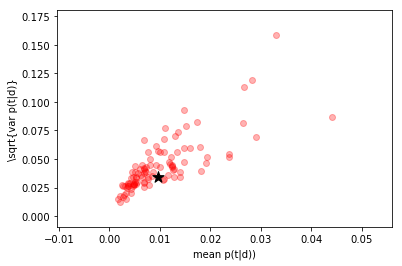

In [3]:
scatter(p_tds, np.sqrt(p_tds_var), c='r', alpha=0.3)
scatter(p_tds[9], np.sqrt(p_tds_var[9]), marker='*', s=140, c='k')

xlabel("mean p(t|d))")
ylabel(r"\sqrt{var p(t|d)}")

In [4]:
def draw(topic):
    scatter(p_tds, np.sqrt(p_tds_var), c='r', alpha=0.3)
    scatter(p_tds[topic], np.sqrt(p_tds_var[topic]), marker='*', s=140, c='k')
    xlabel("mean p(t|d))")
    ylabel(r"\sqrt{var p(t|d)}")
    return 0

0

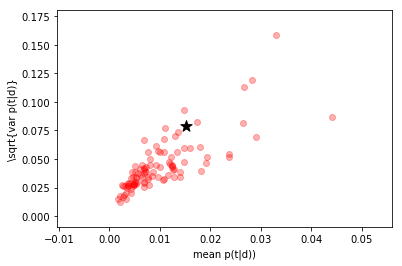

In [5]:
draw(10)

0

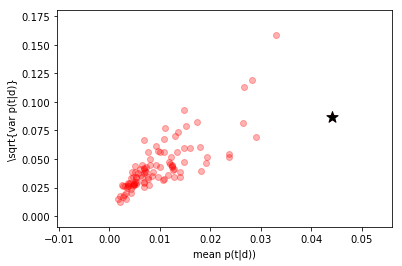

In [6]:
draw(5)

0

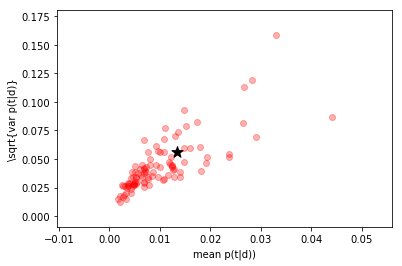

In [7]:
draw(48)

0

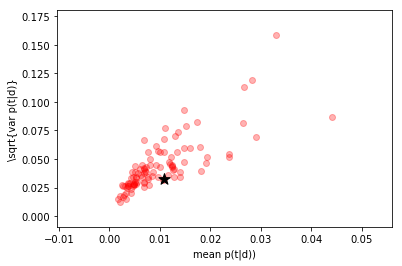

In [8]:
draw(25)

0

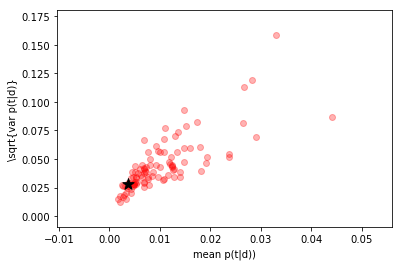

In [9]:
draw(3)

0

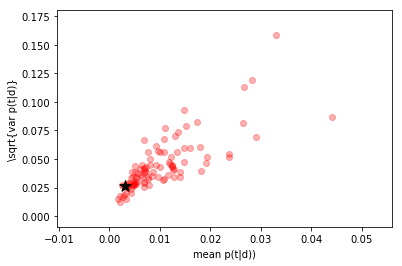

In [10]:
draw(99)

0

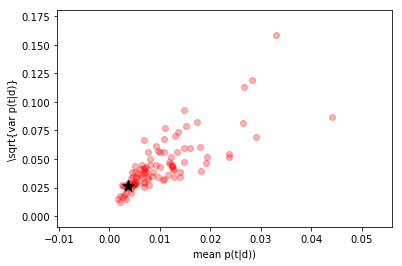

In [11]:
draw(58)

0

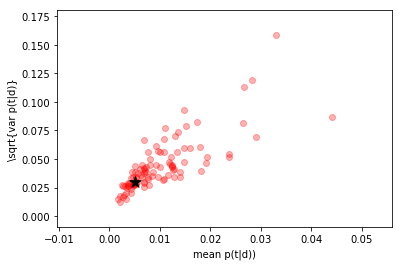

In [12]:
draw(84)

0

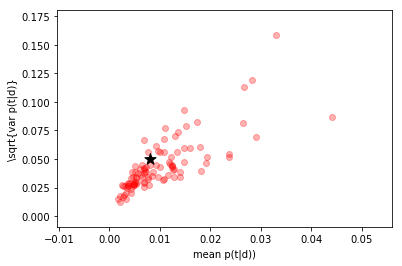

In [13]:
draw(97)

0

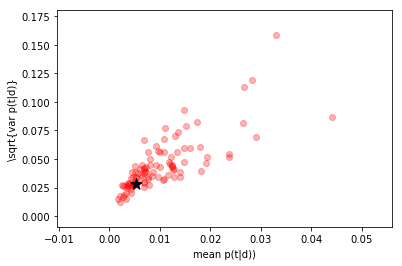

In [14]:
draw(15)

## (0.03,0.15)
0.15  high variance , different, shown in few document
0,03 3 percent in whole corpus
#.7,.2,.1
#.7,.2,.1
#.45,.45,.1
#.5,.5,0
t1 and t2 have high prob, high variance; t3 low prob low var


using k to measure. y/x

    "interesting topic Q" in comparing Z and T means p(Q|Z)and p(Q|T) > p(Q|corpus) and var(p(Q|corpus) is high relative to other topics with similar p(t|corpus)
